###  Beginner EDA Project: Understanding Patient Admission Patterns

####  Problem Statement
A city hospital wants to analyze its admission trends to improve scheduling, reduce waiting times, and manage resources more effectively. This project explores anonymized patient admission data to uncover useful patterns.

####  Objective
- Practice EDA using Pandas and visualization libraries.
- Identify trends in admissions by gender, age, department, and room type.
- Summarize insights using plots and tables.

####  Dataset Information
- **Dataset Name:** Hospital Admissions Data  
- **Source:** [Kaggle - Hospital Admissions Data](https://www.kaggle.com/datasets/ashishsahani/hospital-admissions-data)


#####  Dataset Columns:
- `patientid`: Unique identifier for each patient  
- `age`: Age of the patient  
- `gender`: Gender of the patient  
- `admission_type`: Type of admission (Emergency, Scheduled, Trauma)  
- `department`: Department where admitted (General, Surgery, etc.)  
- `room_type`: Room type assigned (General, Private, Semi-Private)  
- `admission_day`: Day of the week of admission  
- `previous_visits`: Number of prior visits  


####  Step 1: Import Required Libraries
We'll begin by importing essential libraries such as Pandas for data analysis, and Matplotlib/Seaborn for data visualization.


In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

####  Step 2: Load the Dataset and Explore Basic Information
We will load the hospital admissions dataset and explore its structure by checking the first few rows, column info, missing values, and basic statistics.


In [21]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None) 
df = pd.read_csv('HDHI Admission data.csv')
print(" First 5 rows of the dataset:")
display(df.head())

 First 5 rows of the dataset:


,SNO,MRD No.,D.O.A,D.O.D,AGE,GENDER,RURAL,TYPE OF ADMISSION-EMERGENCY/OPD,month year,DURATION OF STAY,duration of intensive unit stay,OUTCOME,SMOKING,ALCOHOL,DM,HTN,CAD,PRIOR CMP,CKD,HB,TLC,PLATELETS,GLUCOSE,UREA,CREATININE,BNP,RAISED CARDIAC ENZYMES,EF,SEVERE ANAEMIA,ANAEMIA,STABLE ANGINA,ACS,STEMI,ATYPICAL CHEST PAIN,HEART FAILURE,HFREF,HFNEF,VALVULAR,CHB,SSS,AKI,CVA INFRACT,CVA BLEED,AF,VT,PSVT,CONGENITAL,UTI,NEURO CARDIOGENIC SYNCOPE,ORTHOSTATIC,INFECTIVE ENDOCARDITIS,DVT,CARDIOGENIC SHOCK,SHOCK,PULMONARY EMBOLISM,CHEST INFECTION
0,1,234735,4/1/2017,4/3/2017,81,M,R,E,Apr-17,3,2,DISCHARGE,0,0,1,0,0,0,0,9.5,16.1,337,80,34,0.9,1880,1,35,0,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,234696,4/1/2017,4/5/2017,65,M,R,E,Apr-17,5,2,DISCHARGE,0,1,0,1,1,0,0,13.7,9,149,112,18,0.9,NaN,0,42,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,3,234882,4/1/2017,4/3/2017,53,M,U,E,Apr-17,3,3,DISCHARGE,0,0,1,0,1,0,0,10.6,14.7,329,187,93,2.3,210,0,NaN,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,234635,4/1/2017,4/8/2017,67,F,U,E,Apr-17,8,6,DISCHARGE,0,0,0,1,1,0,0,12.8,9.9,286,130,27,0.6,NaN,0,42,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,234486,4/1/2017,4/23/2017,60,F,U,E,Apr-17,23,9,DISCHARGE,0,0,0,1,0,1,0,13.6,9.1,26,144,55,1.25,1840,0,16,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [22]:
print("\n Dataset Info:")
df.info()


 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15757 entries, 0 to 15756
Data columns (total 56 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   SNO                              15757 non-null  int64 
 1   MRD No.                          15757 non-null  object
 2   D.O.A                            15757 non-null  object
 3   D.O.D                            15757 non-null  object
 4   AGE                              15757 non-null  int64 
 5   GENDER                           15757 non-null  object
 6   RURAL                            15757 non-null  object
 7   TYPE OF ADMISSION-EMERGENCY/OPD  15757 non-null  object
 8   month year                       15757 non-null  object
 9   DURATION OF STAY                 15757 non-null  int64 
 10  duration of intensive unit stay  15757 non-null  int64 
 11  OUTCOME                          15757 non-null  object
 12  SMOKING         

In [23]:
columns_to_keep = [
    'AGE',
    'GENDER',
    'D.O.A',
    'TYPE OF ADMISSION-EMERGENCY/OPD',  # original name, not yet renamed
    'OUTCOME',
    'PRIOR CMP',
    'DURATION OF STAY'
]

# Step 2: Drop other columns
df = df[columns_to_keep]

In [24]:
print("\n Missing Values:")
print(df.isnull().sum())


 Missing Values:
AGE                                0
GENDER                             0
D.O.A                              0
TYPE OF ADMISSION-EMERGENCY/OPD    0
OUTCOME                            0
PRIOR CMP                          0
DURATION OF STAY                   0
dtype: int64


In [25]:
print("\n Summary Statistics:")
display(df.describe())


 Summary Statistics:


,AGE,PRIOR CMP,DURATION OF STAY
count,15757.000000,15757.000000,15757.000000
mean,61.426160,0.154471,6.415054
std,13.420862,0.361411,5.011421
min,4.000000,0.000000,1.000000
25%,54.000000,0.000000,3.000000
50%,62.000000,0.000000,5.000000
75%,70.000000,0.000000,8.000000
max,110.000000,1.000000,98.000000


####  Exploratory Data Analysis (EDA)

##### ✅ 1. What is the total number of admissions?


In [26]:
# Total number of admissions = number of rows in the dataset
total_admissions = df.shape[0]
print(f"🔹 Total number of admissions: {total_admissions}")

🔹 Total number of admissions: 15757


##### ✅ 2. What is the distribution of gender among admitted patients?

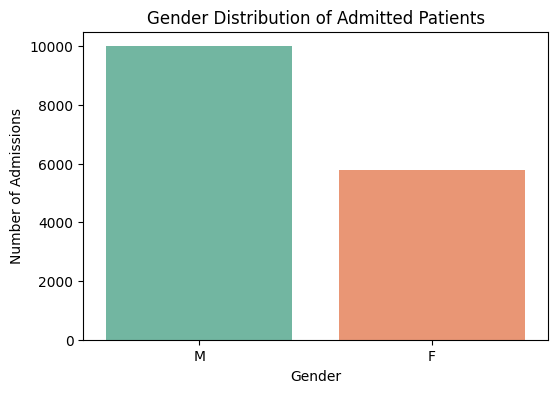

In [27]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='GENDER', palette='Set2')
plt.title('Gender Distribution of Admitted Patients')
plt.xlabel('Gender')
plt.ylabel('Number of Admissions')
plt.show()

##### ✅ 3. Which age group is most frequently admitted?

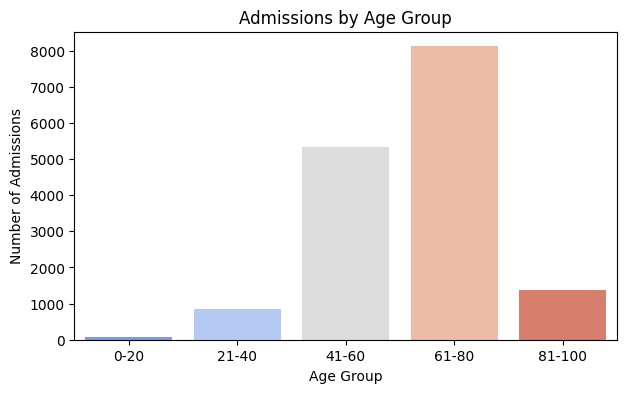

In [28]:
# Create age bins
age_bins = [0, 20, 40, 60, 80, 100]
age_labels = ['0-20', '21-40', '41-60', '61-80', '81-100']
df['AGE_GROUP'] = pd.cut(df['AGE'], bins=age_bins, labels=age_labels, right=False)
age_group_counts = df['AGE_GROUP'].value_counts().sort_index()
plt.figure(figsize=(7,4))
sns.barplot(x=age_group_counts.index, y=age_group_counts.values, palette='coolwarm')
plt.title('Admissions by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Admissions')
plt.show()


##### ✅ 4. What are the most common admission types?

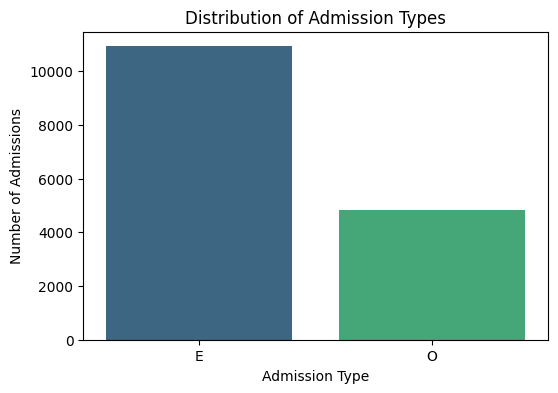

In [29]:
df.rename(columns={'TYPE OF ADMISSION-EMERGENCY/OPD': 'ADMISSION_TYPE'}, inplace=True)
admission_type_counts = df['ADMISSION_TYPE'].value_counts()
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='ADMISSION_TYPE', palette='viridis')
plt.title('Distribution of Admission Types')
plt.xlabel('Admission Type')
plt.ylabel('Number of Admissions')
plt.show()

##### ✅ 5. Which departments have the highest number of admissions?

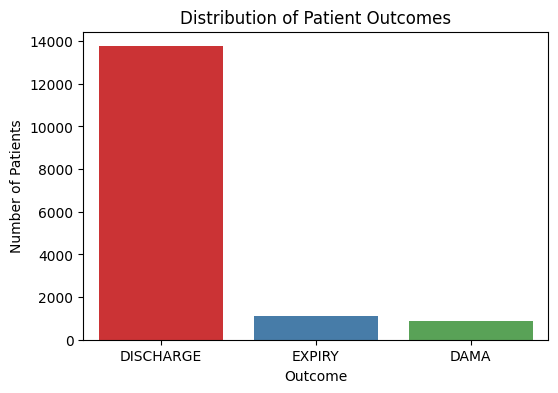

In [30]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='OUTCOME', palette='Set1')
plt.title('Distribution of Patient Outcomes')
plt.xlabel('Outcome')
plt.ylabel('Number of Patients')
plt.show()

##### ✅ Q6: What is the average duration of stay for admitted patients?

count    15757.000000
mean         6.415054
std          5.011421
min          1.000000
25%          3.000000
50%          5.000000
75%          8.000000
max         98.000000
Name: DURATION OF STAY, dtype: float64

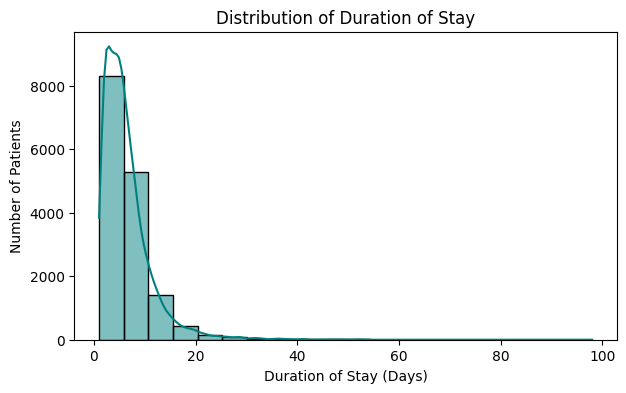

In [31]:
display(df['DURATION OF STAY'].describe())
plt.figure(figsize=(7,4))
sns.histplot(df['DURATION OF STAY'], bins=20, kde=True, color='teal')
plt.title('Distribution of Duration of Stay')
plt.xlabel('Duration of Stay (Days)')
plt.ylabel('Number of Patients')
plt.show()

##### ✅ 7. On which day of the week do most patients get admitted?

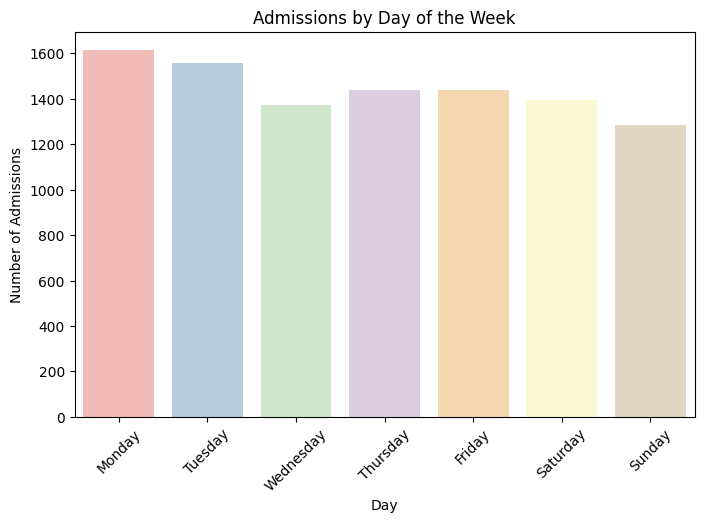

In [32]:
# Convert 'D.O.A' column to datetime format
df['D.O.A'] = pd.to_datetime(df['D.O.A'], errors='coerce')
# Extract day of the week
df['ADMISSION_DAY'] = df['D.O.A'].dt.day_name()
# Plot
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='ADMISSION_DAY', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], palette='Pastel1')
plt.title('Admissions by Day of the Week')
plt.xlabel('Day')
plt.ylabel('Number of Admissions')
plt.xticks(rotation=45)
plt.show()

##### ✅ 8. What percentage of patients have visited before (`previous_visits > 0`)?

In [33]:
# Count of patients with prior CMP
prior_cmp_counts = df['PRIOR CMP'].value_counts()
print("🔹 Prior CMP Counts:\n")
print(prior_cmp_counts)

# Percentage calculation
visited_before_pct = (prior_cmp_counts.get(1, 0) / df.shape[0]) * 100
print(f"\n Percentage of patients with prior cardiomyopathy: {visited_before_pct:.2f}%")


🔹 Prior CMP Counts:

PRIOR CMP
0    13323
1     2434
Name: count, dtype: int64

 Percentage of patients with prior cardiomyopathy: 15.45%


##### ✅ 9. Is there a difference in admission types across genders?

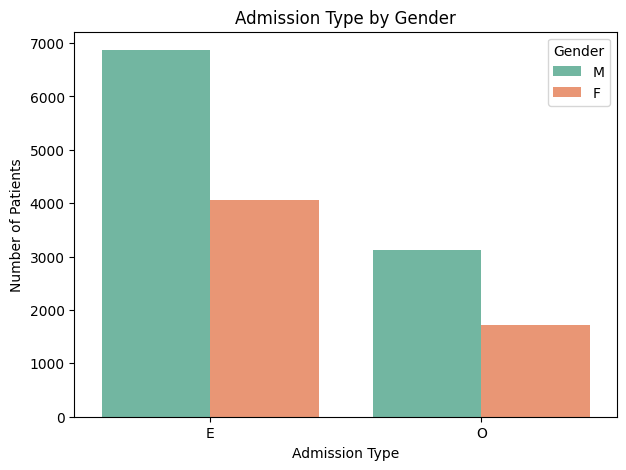

In [34]:
plt.figure(figsize=(7,5))
sns.countplot(data=df, x='ADMISSION_TYPE', hue='GENDER', palette='Set2')
plt.title('Admission Type by Gender')
plt.xlabel('Admission Type')
plt.ylabel('Number of Patients')
plt.legend(title='Gender')
plt.show()

##### ✅ 10. Visualizations of Interesting Patterns
- 📊 Plot 1: Admission Type vs Outcome

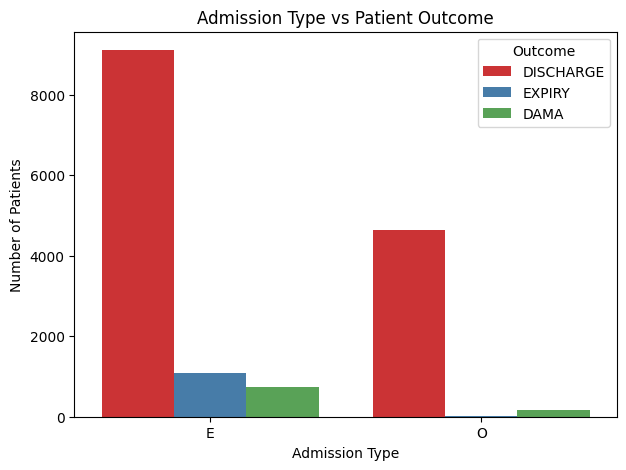

In [35]:
plt.figure(figsize=(7,5))
sns.countplot(data=df, x='ADMISSION_TYPE', hue='OUTCOME', palette='Set1')
plt.title('Admission Type vs Patient Outcome')
plt.xlabel('Admission Type')
plt.ylabel('Number of Patients')
plt.legend(title='Outcome')
plt.show()


- 📊 Plot 2: Patient Outcome by Gender

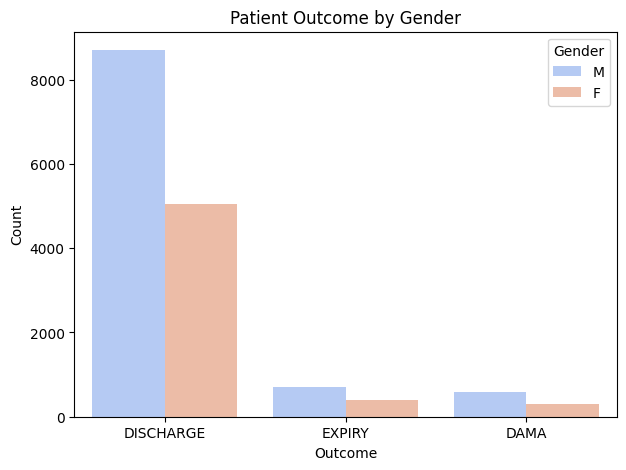

In [36]:
plt.figure(figsize=(7,5))
sns.countplot(data=df, x='OUTCOME', hue='GENDER', palette='coolwarm')
plt.title('Patient Outcome by Gender')
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.show()

- 📊 Plot 3: Effect of Prior Cardiomyopathy (CMP) on Patient Outcome

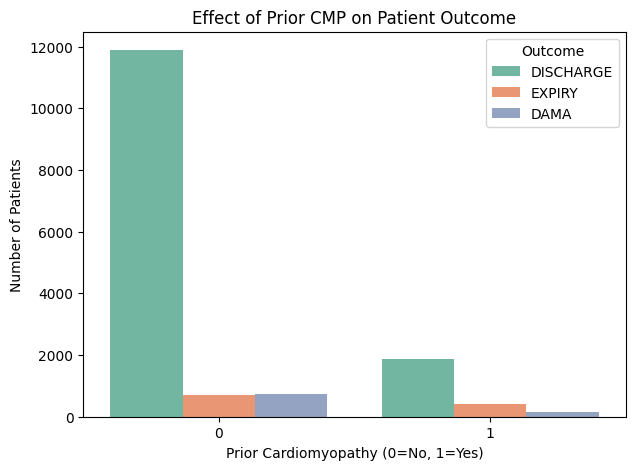

In [37]:
plt.figure(figsize=(7,5))
sns.countplot(data=df, x='PRIOR CMP', hue='OUTCOME', palette='Set2')
plt.title('Effect of Prior CMP on Patient Outcome')
plt.xlabel('Prior Cardiomyopathy (0=No, 1=Yes)')
plt.ylabel('Number of Patients')
plt.legend(title='Outcome')
plt.show()